In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#importing data
df=pd.read_csv("/content/virat koli.csv")

In [3]:
#data info
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [5]:
#checking null values
df.isnull().sum()

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [7]:
#feature selection
df_sec=df.select_dtypes(exclude=["object"])

In [8]:
df_sec

,Runs,BF,4s,6s,SR,Pos,Inns
0,12,22,1,0,54.54,2.0,1
1,37,67,6,0,55.22,2.0,2
2,25,38,4,0,65.78,1.0,1
3,54,66,7,0,81.81,1.0,1
4,31,46,3,1,67.39,1.0,2
...,...,...,...,...,...,...,...
127,45,51,2,1,88.23,3.0,2
128,65,76,2,1,85.52,3.0,1
129,122,105,8,5,116.19,3.0,2
130,8,5,2,0,160.00,3.0,1


In [9]:
df_sec.columns

Index(['Runs', 'BF', '4s', '6s', 'SR', 'Pos', 'Inns'], dtype='object')

In [10]:
# split x and y
x=df_sec[['BF', '4s', '6s', 'SR', 'Pos', 'Inns']]
y=df_sec["Runs"]

In [11]:
#scaling
scaler=StandardScaler()


In [17]:
#train_test_split
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.7)


In [18]:
# scale fit and Transform
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.03092693e+00, -2.86281209e-01, -4.94048419e-01,
         3.89459138e+00,  2.83084504e+00, -1.14017543e+00],
       [ 9.23129258e-02,  8.89516615e-01,  7.87877216e+00,
         3.39971402e+00, -3.97722030e-01,  8.77058019e-01],
       [-1.25009569e+00, -9.91759904e-01, -4.94048419e-01,
        -2.26823808e+00, -3.97722030e-01,  8.77058019e-01],
       [-1.16790740e+00, -9.91759904e-01, -4.94048419e-01,
        -1.28585200e+00, -3.97722030e-01,  8.77058019e-01],
       [-4.00816768e-01, -5.11216445e-02,  7.02068806e-01,
         1.45940572e+00, -3.97722030e-01, -1.14017543e+00],
       [ 2.50316921e+00,  4.19197485e-01,  5.48653771e+00,
         6.37066334e-01, -3.97722030e-01, -1.14017543e+00],
       [-5.10401145e-01, -2.86281209e-01, -4.94048419e-01,
        -3.03465915e-01,  6.78466993e-01,  8.77058019e-01],
       [ 7.49819184e-01, -5.21440774e-01,  7.02068806e-01,
         2.52423719e-01, -3.97722030e-01, -1.14017543e+00],
       [-1.19530350e+00, -9.91759904e-01, -4.940

In [19]:
#ridge
ridge=Ridge()

In [20]:
#parameter for alpha values
parameter={"alpha":[1,2,3,4,5,6,7,67,8,55,10,20]}

In [22]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [23]:
#ridgecv parameter fitting
ridgecv=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=10)

In [24]:
#Training the model
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 67, 8, 55, 10, 20]},
             scoring='neg_mean_squared_error')

In [25]:
# Best alpha value
ridgecv.best_params_

{'alpha': 3}

In [26]:
#best score
ridgecv.best_score_

-35.53085392514167

In [28]:
#prediction
rid_pre=ridgecv.predict(x_test)

# The variance is about -20 15

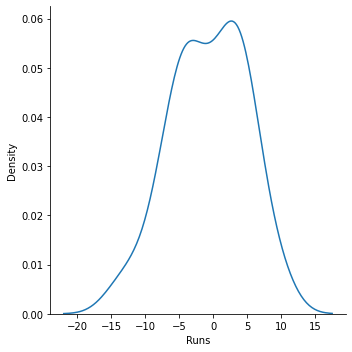

In [31]:
#plotting
sns.displot(rid_pre-y_test,kind="kde")

In [32]:
#importing R2 score
from sklearn.metrics import r2_score

In [34]:
#r2 score
score=r2_score(rid_pre,y_test)

# r_squared =0.99

In [35]:
#r2 values
score

0.985781548172359

# Lasso 


In [42]:
#importing Lasso Model
from sklearn.linear_model import Lasso

In [46]:
# Lasso
lasso=Lasso()

In [47]:
# fiitng GridSearchCv for finding best alpha value
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=10)

In [49]:
#lasso model fitiing
lassocv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 67, 8, 55, 10, 20]},
             scoring='neg_mean_squared_error')

In [50]:
#lasso best alpha =1
lassocv.best_params_

{'alpha': 1}

In [51]:
# lasso best score
lassocv.best_score_

-40.18115121956801

In [52]:
#Lasso Prediction
las_pre=lassocv.predict(x_test)

In [53]:
# r-squared score 
score=r2_score(las_pre,y_test)

In [54]:
score=r2_score(las_pre,y_test)


# r_squared =0.98

In [55]:
score

0.982885608093623

# The variance is -20 to 20

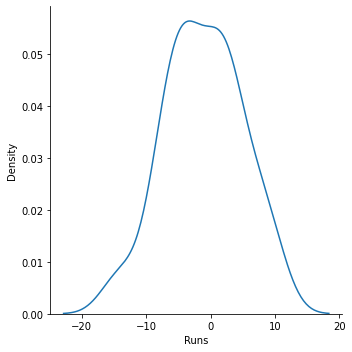

In [56]:
sns.displot(las_pre-y_test,kind="kde")